**Importing libraries**

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import euclidean_distances

**Importing the dataset, Remove last column to appear as color**

In [38]:
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('zoo.csv')
df.head()
features = list(df.columns)
print(features)

features.remove('class_type')
features.remove('animal_name')

print(features)


X = df[features].values.astype(np.float32)
color = df.class_type


print(X.shape)
print(color.shape)

['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type']
['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize']
(101, 16)
(101,)


**Find optimal number of eigenvector to be decomposed**

PCA Variance Ratio =  [0.62561536 0.14496902]
PCA Variance Ratio =  [0.29191086 0.20882927]
(101, 2)
(101,)


Text(0.5, 1.0, 'centered + standardlized + PCA')

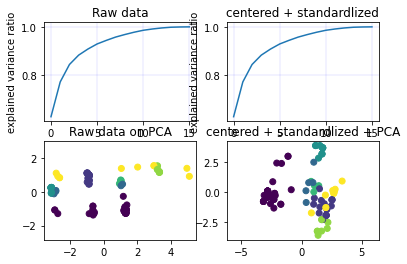

In [39]:
from sklearn.decomposition import PCA

fig_PCA, axs_PCA = plt.subplots(2, 2)

pca_raw = PCA().fit(X)
axs_PCA[0,0].plot(np.cumsum(pca_raw.explained_variance_ratio_))
axs_PCA[0,0].grid(color='b', linestyle='-', linewidth=0.1)
axs_PCA[0,0].set_xlabel('number of components')
axs_PCA[0,0].set_ylabel('explained variance ratio');
axs_PCA[0,0].set_title("Raw data")

pca_raw_2 = PCA(n_components=2)
pca_raw_2.fit(X)
X_pca = pca_raw_2.transform(X)
X_pca_variance = pca_raw_2.explained_variance_ratio_
print ("PCA Variance Ratio = ", X_pca_variance)
axs_PCA[1,0].scatter(X_pca[:, 0], X_pca[:, 1], c=color)
axs_PCA[1,0].axis('equal');
axs_PCA[1,0].set_title("Raw data on PCA")


X_standraded = StandardScaler().fit_transform(X)

pca_fit = PCA().fit(X_standraded)
axs_PCA[0,1].plot(np.cumsum(pca_raw.explained_variance_ratio_))
axs_PCA[0,1].grid(color='b', linestyle='-', linewidth=0.1)
axs_PCA[0,1].set_xlabel('number of components')
axs_PCA[0,1].set_ylabel('explained variance ratio')
axs_PCA[0,1].set_title("centered + standardlized")

pca_fit_2 = PCA(n_components=2)
pca_fit_2.fit(X_standraded)
X_standrad_pca = pca_fit_2.transform(X_standraded)
X_pca_variance = pca_fit_2.explained_variance_ratio_
print ("PCA Variance Ratio = ", X_pca_variance)
print(X_standrad_pca.shape)
print(color.shape)
axs_PCA[1,1].scatter(X_standrad_pca[:, 0], X_standrad_pca[:, 1], c=color)
axs_PCA[1,1].axis('equal');
axs_PCA[1,1].set_title("centered + standardlized + PCA")


**Apply PCA and calculate data variance**

[0.24448583 0.15880797 0.24291736 0.24115283 0.18115871 0.22938927
 0.2470346  0.23919223 0.14645623 0.16468974 0.07293403 0.13998627
 4.09371639 0.19115775 0.11214586 0.24585824]
PCA Variance Ratio =  [0.29191086 0.20882927]
(101, 2)
(101,)


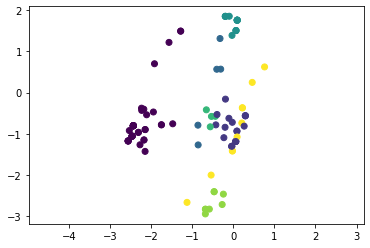

In [40]:
from sklearn.decomposition import PCA

X_standraded = StandardScaler().fit_transform(X)
var = StandardScaler().fit(X).var_
print (var)
pca = PCA(n_components=2)

pca.fit(X_standraded)
X_pca = pca.transform(X)

X_pca_variance = pca.explained_variance_ratio_
print ("PCA Variance Ratio = ", X_pca_variance)
print(X_pca.shape)
print(color.shape)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=color)
plt.axis('equal');

**Apply MDS and calculate data variance**

In [ ]:
def my_mds_classic(data,n_component):
    #Init
    m,n=data.shape
    dist_squ=np.zeros((m,m))
    disti=np.zeros(m)
    distj=np.zeros(m)
    S=np.zeros((m,m))

    #[D]ij^2 = ‖yi−yj‖2
    for i in range(m):
        dist_squ[i] = np.sum(np.square(data[i]-data),axis=1).reshape(1,m)
    for i in range(m):
        # D_i.^2 = 1/n \sum {i}{m} [D]ij^2
        disti[i] = np.mean(dist_squ[i,:])

        # D_.j^2 = 1/n \sum {j}{m} [D]ij^2
        distj[i] = np.mean(dist_squ[:,i])

    # D_..^2 = 1/n^2 \sum {i}{m} \sum {j}{m} [D]ij^2
    distij = np.mean(dist_squ)

    # Double Cenetering trick
    for i in range(m):
        for j in range(m):
            S[i,j] = -0.5*(dist_squ[i,j] - disti[i] - distj[j] + distij)

    #EVD of S
    lamda,V = np.linalg.eigh(S)

    # Sort the eigen value from big to small, take the first n_component portion
    index = np.argsort(-lamda)[:n_component]

    #get Lambda ^1/2
    diag_lamda = np.sqrt(np.diag(-np.sort(-lamda)[:n_component]))
    print (diag_lamda)

    #get U_n_component
    V_selected = V[:,index]

    # X =  Lambda ^1/2 * get U_n_component
    Z = V_selected.dot(diag_lamda)

    return Z

In [42]:
X_standraded = StandardScaler().fit_transform(X)

X_mds  = my_mds_classic(X_standraded,2)
plt.scatter(X_mds[:, 0], X_mds[:, 1], c=color)
plt.axis('equal');

'\ndata = np.array([[1,1],[2,2],[3,3] ])\nprint(data.shape)\nm,n=data.shape\ndist=np.zeros((m,m))\n\ne = euclidean_distances(data)\nprint ("euc_dis =", e)\nfor i in range(m):\n        a = data[i]-data\n        b = np.square(a)\n        dist[i] = np.sum(b,axis=1).reshape(1,m)\nprint ("dist_dis =", dist)\n'

In [43]:
X_mds  = my_mds_classic(X,2)
plt.scatter(X_mds[:, 0], X_mds[:, 1], c=color)
plt.axis('equal');

[[21.71930003  0.        ]
 [ 0.         18.37029514]]


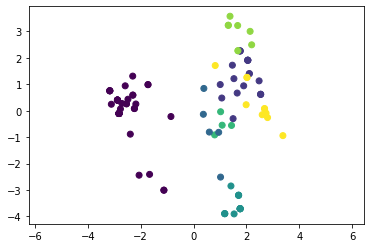

In [44]:
"""
from sklearn.manifold import MDS

fig, axs = plt.subplots(2, 2)

clf2=MDS(2)
X_t2=clf2.fit_transform(X)

axs[0,0].scatter(X_t2[:, 0], X_t2[:, 1], c=color)
axs[0,0].axis('equal');
axs[0, 0].set_title("MDS data")

dissimilarities = euclidean_distances(X)
clf2=MDS(2, dissimilarity = 'precomputed')
X_t2=clf2.fit_transform(dissimilarities)

axs[0,1].scatter(X_t2[:, 0], X_t2[:, 1], c=color)
axs[0,1].axis('equal');
axs[0, 1].set_title("MDS similarity")

X_standraded = StandardScaler().fit_transform(X)
clf2=MDS(2)
X_t2=clf2.fit_transform(X_standraded)

axs[1,0].scatter(X_t2[:, 0], X_t2[:, 1], c=color)
axs[1,0].axis('equal');
axs[1,0].set_title("MDS data standrad")

X_standraded = StandardScaler().fit_transform(X)
dissimilarities = euclidean_distances(X_standraded)
clf2=MDS(2, dissimilarity = 'precomputed')
X_t2=clf2.fit_transform(dissimilarities)

axs[1,1].scatter(X_t2[:, 0], X_t2[:, 1], c=color)
axs[1,1].axis('equal');
axs[1,1].set_title("MDS standrad and later simialrity")
"""


**Apply Feature selection before MDS**

In [46]:
X_standrad = StandardScaler().fit_transform(X)
fig, axs = plt.subplots(2, 2)

from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=1)
X_rm_low_var = sel.fit_transform(X_standrad)
#print(X_standrad.shape)
#print(X_rm_low_var.shape)
X_rm_low_var_mds  = my_mds_classic(X_rm_low_var,2)
axs[0,0].scatter(X_rm_low_var_mds[:, 0], X_rm_low_var_mds[:, 1], c=color)
axs[0,0].axis('equal');
axs[0, 0].set_title("VarThreshold = 1")

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

X_mutual_info = SelectKBest(score_func=mutual_info_classif, k=7).fit_transform(X_standrad, color)

#print(X_standrad.shape)
#print(X_mutual_info.shape)
X_mutual_info_mds  = my_mds_classic(X_mutual_info,2)
axs[0,1].scatter(X_mutual_info_mds[:, 0], X_mutual_info_mds[:, 1], c=color)
axs[0,1].axis('equal');
axs[0, 1].set_title("Mutual infomation")

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

RFE = RFE(estimator=LogisticRegression(), n_features_to_select=7).fit(X_standrad, color)
print("Ranking",RFE.ranking_)
X_RFE= RFE.transform(X_standrad)
#print(X_standrad.shape)
#print(X_RFE.shape)
#print(X_RFE)
X_RFE_mds  = my_mds_classic(X_RFE,2)
axs[1,0].scatter(X_RFE_mds[:, 0], X_RFE_mds[:, 1], c=color)
axs[1,0].axis('equal');
axs[1,0].set_title("Recursive feature elimination")

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

X_LRP = SelectFromModel(LogisticRegression(penalty="l2", C=0.16,solver='liblinear')).fit_transform(X_standrad, color)

print(X_standrad.shape)
print(X_LRP.shape)
#print(X_LRP)
X_LRP_mds  = my_mds_classic(X_LRP,2)
axs[1,1].scatter(X_LRP_mds[:, 0], X_LRP_mds[:, 1], c=color)
axs[1,1].axis('equal');
axs[1,1].set_title("Embedded + LR")


'\nfrom sklearn.manifold import MDS\n\nfig, axs = plt.subplots(2, 2)\n\nclf2=MDS(2)\nX_t2=clf2.fit_transform(X)\n\naxs[0,0].scatter(X_t2[:, 0], X_t2[:, 1], c=color)\naxs[0,0].axis(\'equal\');\naxs[0, 0].set_title("MDS data")\n\ndissimilarities = euclidean_distances(X)\nclf2=MDS(2, dissimilarity = \'precomputed\')\nX_t2=clf2.fit_transform(dissimilarities)\n\naxs[0,1].scatter(X_t2[:, 0], X_t2[:, 1], c=color)\naxs[0,1].axis(\'equal\');\naxs[0, 1].set_title("MDS similarity")\n\nX_standraded = StandardScaler().fit_transform(X)\nclf2=MDS(2)\nX_t2=clf2.fit_transform(X_standraded)\n\naxs[1,0].scatter(X_t2[:, 0], X_t2[:, 1], c=color)\naxs[1,0].axis(\'equal\');\naxs[1,0].set_title("MDS data standrad")\n\nX_standraded = StandardScaler().fit_transform(X)\ndissimilarities = euclidean_distances(X_standraded)\nclf2=MDS(2, dissimilarity = \'precomputed\')\nX_t2=clf2.fit_transform(dissimilarities)\n\naxs[1,1].scatter(X_t2[:, 0], X_t2[:, 1], c=color)\naxs[1,1].axis(\'equal\');\naxs[1,1].set_title("MDS s

**Apply ISOMAP and calculate data variance**

[[17.71605573  0.        ]
 [ 0.         14.18577113]]
[[19.40404004  0.        ]
 [ 0.         13.20054587]]


AttributeError: 'numpy.ndarray' object has no attribute 'ranking_'

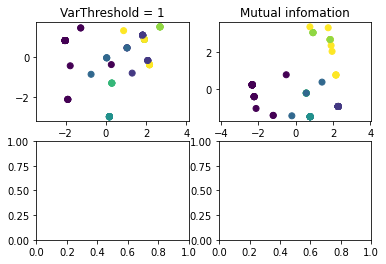

In [47]:
def my_mds_classic(data,n_component):
    #Init
    m,n=data.shape
    dist_squ=np.zeros((m,m))
    disti=np.zeros(m)
    distj=np.zeros(m)
    S=np.zeros((m,m))

    #[D]ij^2 = ‖yi−yj‖2
    for i in range(m):
        dist_squ[i] = np.sum(np.square(data[i]-data),axis=1).reshape(1,m)
    for i in range(m):
        # D_i.^2 = 1/n \sum {i}{m} [D]ij^2
        disti[i] = np.mean(dist_squ[i,:])

        # D_.j^2 = 1/n \sum {j}{m} [D]ij^2
        distj[i] = np.mean(dist_squ[:,i])

    # D_..^2 = 1/n^2 \sum {i}{m} \sum {j}{m} [D]ij^2
    distij = np.mean(dist_squ)

    # Double Cenetering trick
    for i in range(m):
        for j in range(m):
            S[i,j] = -0.5*(dist_squ[i,j] - disti[i] - distj[j] + distij)

    #EVD of S
    lamda,V = np.linalg.eigh(S)

    # Sort the eigen value from big to small, take the first n_component portion
    index = np.argsort(-lamda)[:n_component]

    #get Lambda ^1/2
    diag_lamda = np.sqrt(np.diag(-np.sort(-lamda)[:n_component]))
    print (diag_lamda)

    #get U_n_component
    V_selected = V[:,index]

    # X =  Lambda ^1/2 * get U_n_component
    Z = V_selected.dot(diag_lamda)

    return Z

In [ ]:
def dist(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

In [ ]:
def my_isomap(data, n_components, n_neighbors):

    # Compute distance matrix
    distances = np.array([[dist(p, q) for p in data] for q in data])

    # Keep only the nearest neighbors, others set to 0 (= unreachable)
    neighbors = np.zeros_like(distances)
    
    #sort distance of the n_neighbors, 
    sort_distances = np.argsort(distances, axis=1)[:, 1:n_neighbors+1]
    
    # symetric
    for k,i in enumerate(sort_distances):
        neighbors[k,i] = distances[k,i]
        
    from sklearn.utils.graph import graph_shortest_path
    
    # apply Dijiska shortest distance algorithm
    graph = graph_shortest_path(neighbors, directed=False)
        
    # apply mds on the graph G
    X_iso = my_mds_classic(graph, n_components)
    return X_iso


In [ ]:
X_standrad = StandardScaler().fit_transform(X)
_, axs_iso = plt.subplots(2, 2)
X_isomap = my_isomap (X_standrad,2,2)
axs_iso[0,0].scatter(X_isomap[:, 0], X_isomap[:, 1], c=color)
axs_iso[0,0].axis('equal');
axs_iso[0,0].set_title("n_neighbors=2")

X_isomap = my_isomap (X_standrad,2,4)
axs_iso[0,1].scatter(X_isomap[:, 0], X_isomap[:, 1], c=color)
axs_iso[0,1].axis('equal');
axs_iso[0,1].set_title("n_neighbors=4")

X_isomap = my_isomap (X_standrad,2,6)
axs_iso[1,0].scatter(X_isomap[:, 0], X_isomap[:, 1], c=color)
axs_iso[1,0].axis('equal');
axs_iso[1,0].set_title("n_neighbors=6")

X_isomap = my_isomap (X_standrad,2,8)
axs_iso[1,1].scatter(X_isomap[:, 0], X_isomap[:, 1], c=color)
axs_iso[1,1].axis('equal');
axs_iso[1,1].set_title("n_neighbors=8")


In [ ]:
from mpl_toolkits.mplot3d import Axes3D as As

fig = plt.figure()
X_isomap = my_isomap (X_standrad,3,8)

As = fig.gca(projection='3d')
As.scatter(np.array(X_isomap[:, 0]),np.array(X_isomap[:, 1]), np.array(X_isomap[:, 2]), c=color)
As.axis('auto');